# Proyecto Final de la optativa Python
# Tema: Análisis de datos

## Descripción del dataset:

Este dataset contiene las siguientes columnas principales (entre otras):
- **PassengerId**: Identificador único de los pasajeros.
- **Survived**: `1` si el pasajero sobrevivió, `0` si no.
- **Pclass**: Clase del pasajero (`1`, `2` o `3`)
- **Name**: Nombre completo
- **Sex**: Género (`Male` o `Female`)
- **Age**: Edad en años
- **SibSp**: Número de Hermanos y Esposos abordo
- **Parch**: Número de Padres o Hijos abordo
- **Ticket**: Número del ticket
- **Fare**: Precio del pasaje
- **Cabin**: Número de cabina
- **Embarked**: Puerto donde Embarcó(`C`, `Q`, o `S`)

El objetivo de este dataset es predecir que pasajeros podrian sobrevivir al accidente del Titanic en función de las características proporcionadas.

      

### Importar Librerias
Aquí importamos todas las librerias necesarias para el funcionamiento del proyecto

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

## Exploración de Datos

Explorar los datos para lograr entender la estructura general del dataset, detectar problemas y obtener un resumen estadístico inicial.

### Cargar los datos

In [305]:
data_frame = pd.read_csv('data/Titanic.csv')

### Vista previa del Data Frame

In [306]:
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Proceso de Limpieza de datos
la limpieza de datos es un paso crucial para asegurar que los análisis sean significativos y que los modelos de machine learning funcionen correctamente.

### Ver cuantos falores nulos tiene

In [307]:
missing_data = data_frame.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data) 

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64


### Analizar los detalles de las columnas
Esto nos permite ver la frecuencia, el promedio, los valores únicos y demas detalles de cada columna del Dataset

(Los valores únicos son importantes de analizar porque si son demasiados pueden afectar al modelo de predicción)

In [308]:
data_frame.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


Podemos apreciar que Cabin y Tickets son datos con muchos valores únicos, y tambien habíamos visto antes como Cabin era la columna con mayor cantidad de valores nulos

#### Manejo de valores nulos

In [309]:
# A los valores nulos de la edad le ponemos la mediana de esos valores
data_frame['Age'] = data_frame['Age'].fillna(data_frame['Age'].median())

# A los valores nulos de Embarque le ponemos la moda
data_frame['Embarked'] = data_frame['Embarked'].fillna(data_frame['Embarked'].mode()[0])

## Gráficos para analisar dataset mejor

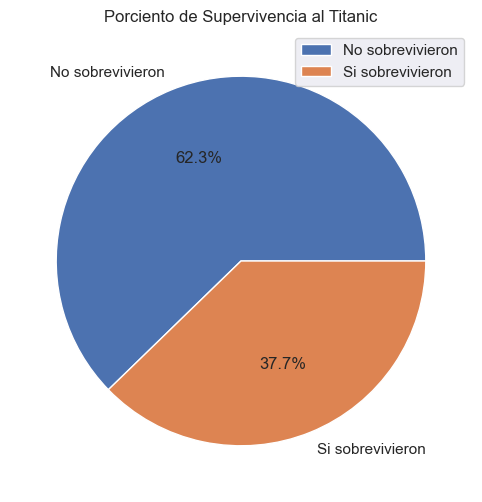

In [310]:
frecuencias = data_frame['Survived'].value_counts()
Array = ['No sobrevivieron','Si sobrevivieron']
# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))  # Opcional: ajusta el tamaño del gráfico
plt.pie(frecuencias, labels=Array, autopct='%1.1f%%')
plt.title('Porciento de Supervivencia al Titanic')  # Título opcional
plt.legend()
plt.show()

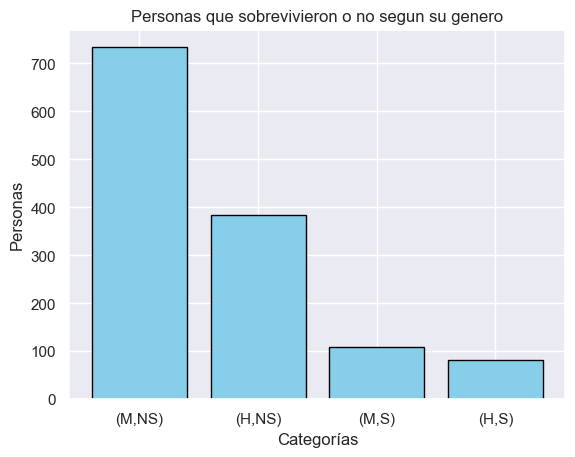

In [311]:
categories =data_frame[['Survived' , 'Sex']].value_counts()
values = ['(M,NS)' , '(H,NS)' , '(M,S)', '(H,S)']

plt.bar(values , categories, color='skyblue', edgecolor='black')
plt.title('Personas que sobrevivieron o no segun su genero')
plt.xlabel('Categorías')
plt.ylabel('Personas')
plt.show()

### Eliminacion de datos atípicos
se realiza una limpieza de datos filtrando los valores de la columna 'Age'. Utilizando el método de los cuartiles y el rango intercuartil (IQR) para identificar y eliminar valores atípicos. 

Se considera que los valores que están fuera de ese rango son valores atípicos que afectan negativamente al entrenamiento del modelo de predicción

In [312]:
q1 = np.percentile(data_frame['Age'],25)
q3 = np.percentile(data_frame['Age'],75)
iqr = q3 - q1
data_frame = data_frame[(data_frame['Age'] < (q3+1.5*iqr)) & (data_frame['Age'] > (q1-1.5*iqr))]

### Convertir variables categóricas en números enteros

La codificación de etiquetas es una forma común de manejar este tipo de variables, permitiendo que algoritmos de machine learning procesen los datos de manera efectiva.

In [313]:
encoder = LabelEncoder()
gender_encode = encoder.fit_transform(data_frame['Sex'])
data_frame['gender_encode'] = gender_encode

#Comparacion para visualizar como era antes la varaible categorica
#y como queda codificada en numeros enteros
comparacion = data_frame[['Sex','gender_encode']]
comparacion.head()


,Sex,gender_encode
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


### Eliminacion de columnas innecesarias
la eliminación de columnas innecesarias es una etapa fundamental en la preparación de datos para machine learning, ayudando a crear modelos más eficientes, interpretables y precisos.

In [314]:
data_frame = data_frame.drop(['PassengerId','Name','Ticket','Sex', 'Cabin'],axis=1)

#Visualizar los datos finales con que entrenaremos el modelo
data_frame.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,gender_encode
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


### Get DUMMIES
en el siguiente codigo utilizamos la función get_dummies() para convertir variables categóricas en variables dummy/indicadoras binarias en un DataFrame. Facilitando así el análisis y la predicción basados en datos categóricos.

In [315]:
data_with_dummies = pd.get_dummies(data_frame)
data_with_dummies.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,gender_encode,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,False,False,True
1,1,1,38.0,1,0,71.2833,0,True,False,False
2,1,3,26.0,0,0,7.9250,0,False,False,True
3,1,1,35.0,1,0,53.1000,0,False,False,True
4,0,3,35.0,0,0,8.0500,1,False,False,True


## Creación del modelo de predicción

### Dividimos los datos en X y Y
Los dividimos de esta manera porque es el formato del modelo de Machine Learning. `X` serían los datos de entrada y `Y` es el resultado 

In [316]:
X = data_with_dummies.drop('Survived',axis=1).values
Y = data_with_dummies['Survived'].values

### Dividir los datos para entrenar y evaluar
Esto se hace para comprobar como se comprueba el modelo con datos reales que nunca ha visto

In [317]:
train_X, test_X, train_y, test_y = train_test_split(X,Y, test_size=0.15, random_state=42)

### Creación y entrenamiento del modelo
elegimos un modelo de árbol de decisión porque es un modelo bastante simple, flexible y bastante eficaz para este problema

In [318]:
modelo = DecisionTreeClassifier(max_depth=None, min_samples_split=10, ccp_alpha=0.01) 

#Entrenar el modelo con las X y las Y de entrenamiento
modelo.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.01, min_samples_split=10)

### Prediccion
Realizamos la predicción usando el modelo con las `X` de evaluacion para obtener `Y`, y comprobamos esa `Y` con las respuestas que conocemos para ver que tan correcta fue la predicción

In [319]:
# Realizamos la predicción
y_pred = modelo.predict(test_X)

# Creamos una lista vacía para almacenar los valores de la comparación
comparacion = []

# Iterar sobre las predicciones para ir obteniendo que resultados son correctos
for i in range(len(y_pred)):
    
    es_correcto = 'correcto' if y_pred[i] == test_y[i] else 'incorrecto'
    comparacion.append([y_pred[i], test_y[i], es_correcto])

# Hacer una tabla para analizarlo   (Ejecutar varias veces para tener filas aleatorias)
df_comparacion = pd.DataFrame(comparacion, columns=['Predicción', 'Resultado Correcto', 'Correcto/Incorrecto'])
df_comparacion.replace({0: 'Falleció', 1: 'Sobrevivió'}, inplace=True)
df_comparacion.sample(20)

,Predicción,Resultado Correcto,Correcto/Incorrecto
78,Sobrevivió,Sobrevivió,correcto
43,Falleció,Falleció,correcto
120,Falleció,Falleció,correcto
96,Sobrevivió,Sobrevivió,correcto
129,Falleció,Falleció,correcto
144,Falleció,Falleció,correcto
28,Falleció,Falleció,correcto
110,Falleció,Falleció,correcto
8,Falleció,Falleció,correcto
34,Sobrevivió,Sobrevivió,correcto


### Realizacion de una matriz de confusión
Una matriz de confusión es una herramienta utilizada para describir el rendimiento de un modelo de machine learning
Otorga los siguientes resultados:
- Verdaderos Positivos
- Verdaderos Negativos
- Falsos Positivos
- Falsos Negativos

In [320]:

cm = confusion_matrix(test_y, y_pred)
print(f"Fallecidos correctamente identificados: {(cm[0][0])}")
print(f"Fallecidos no identificados: {(cm[0][1])}")
print(f"Supervivientes no identificados: {(cm[1][0])}")
print(f"Supervivientes correctamente identificados: {(cm[1][1])}")

Fallecidos correctamente identificados: 114
Fallecidos no identificados: 12
Supervivientes no identificados: 9
Supervivientes correctamente identificados: 47


### Metricas del rendimiento del modelo
Aqui calculamos diferentes métricas para comprobar si el modelo funciona correctamente. Estas son:
- exactitud: proporción de predicciones correctas hechas por el modelo sobre el total de predicciones
- precisión: proporción de predicciones positivas que fueron realmente correctas
- tasa de detectión: proporción de positivos reales que fueron identificados correctamente.

In [321]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)

print(f"Exactitud: {(accuracy * 100):.2f} %")
print(f"Precisión: {(precision * 100):.2f} %")
print(f"Tasa de detección: {(recall * 100):.2f} %")

Exactitud: 88.46 %
Precisión: 79.66 %
Tasa de detección: 83.93 %
